# Setup

In [1]:
!pip install -q numpy matplotlib scikit-learn

# ROC curve

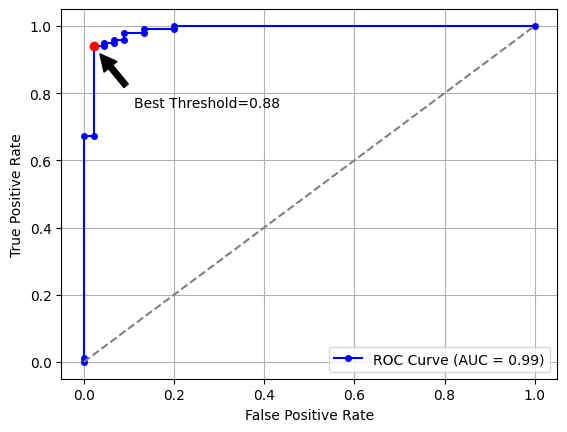

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7
)

# Train the model
model = LogisticRegression(max_iter=2000, random_state=7)
model.fit(X_train, y_train)

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Find the best threshold based on Youden's J statistic
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

# Plot ROC curve
plt.plot(
    fpr,
    tpr,
    marker="o",
    markersize=4,
    color="blue",
    label=f"ROC Curve (AUC = {roc_auc:.2f})",
)
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)

# Annotate the best threshold
plt.plot(fpr[ix], tpr[ix], color="red", marker="o", markersize=6)
plt.annotate(
    f"Best Threshold={best_thresh:.2f}",
    xy=(fpr[ix], tpr[ix]),
    xytext=(fpr[ix] + 0.09, tpr[ix] - 0.18),
    arrowprops=dict(facecolor="black", shrink=0.15),
)
plt.show()

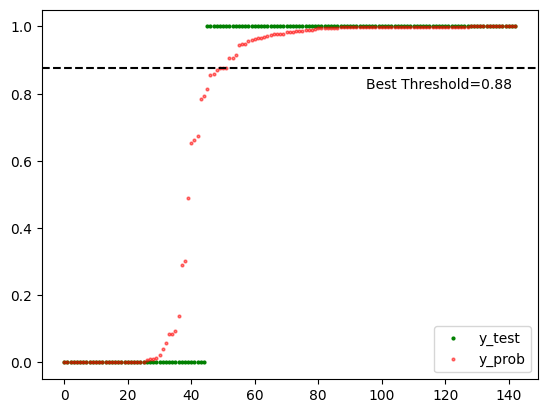

In [3]:
# Sorted y_test and y_prob
sorted_y_test = sorted(y_test)
sorted_y_prob = sorted(y_prob)

# Plot
plt.plot(sorted_y_test, "o", markersize=2, color="green")
plt.plot(sorted_y_prob, "o", markersize=2, color="red", alpha=0.5)
plt.axhline(y=best_thresh, color="black", linestyle="--")
plt.annotate(
    f"Best Threshold={best_thresh:.2f}",
    xy=(95, best_thresh),
    xytext=(95, best_thresh - 0.06),
)
plt.legend(labels=["y_test", "y_prob"], loc="lower right")
plt.show()

# F1-score

In [4]:
import numpy as np
from sklearn.metrics import f1_score

# Consider a series of threshold values
thresholds = np.arange(0, 1.05, 0.05)
best_threshold = 0.0
best_f1 = 0.0

# Find the best threshold and F1 score
for threshold in thresholds:
    predicted_labels = (y_prob >= threshold).astype(int)
    f1 = f1_score(y_true=y_test, y_pred=predicted_labels)
    if f1 > best_f1:
        best_threshold = threshold
        best_f1 = f1

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1 score: {best_f1:.2f}")

Best threshold: 0.70
Best F1 score: 0.97
